In [217]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

### Random Imputation for Numerical Columns

In [219]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [220]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [221]:
y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [224]:
X_train

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [225]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum())
# selects all the null values from the age_imputed columns and replace it with random valid (dropping n/a values) number from 'age' column for all null values

C:\Users\12368\AppData\Local\Temp\ipykernel_29712\2365282359.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum())


In [226]:
X_train

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


C:\Users\12368\AppData\Local\Temp\ipykernel_29712\4045770106.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False)
C:\Users\12368\AppData\Local\Temp\ipykernel_29712\4045770106.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_tra

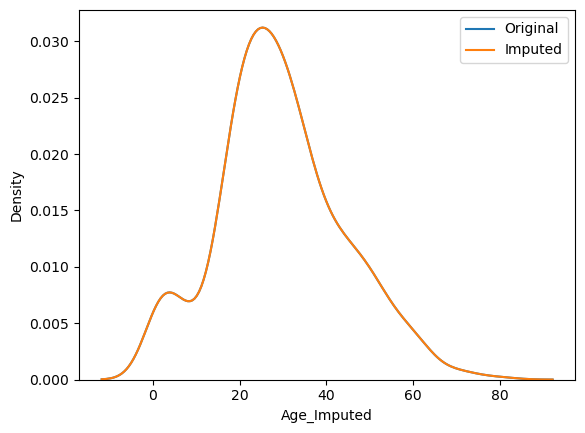

In [227]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# X_train['Age'].plot(kind='kde', ax=ax)
# X_train['Age_Imputed'].plot(kind='kde', color='red', ax=ax)
# lines, labels = ax.get_legend_handles_labels()
# labels = ['Original', 'Imputed']
# ax.legend(lines, labels, loc='best')

sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_Imputed'], label='Imputed', hist=False)
plt.legend()
plt.show()

#### After imputation we do some EDA, generally check variance, covariance and correlation

In [229]:
# Checking the variance of age column before and after imputation
print(f"Original variance of Age: {X_train['Age'].var()}")
print(f"Imputed variance of Age: {X_train['Age_Imputed'].var()}")

Original variance of Age: 210.2517072477438
Imputed variance of Age: 210.2517072477438


In [230]:
# Checking covariance
X_train.cov()

,Age,Fare,Age_Imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,71.580633
Age_Imputed,210.251707,71.580633,210.251707


<Axes: >

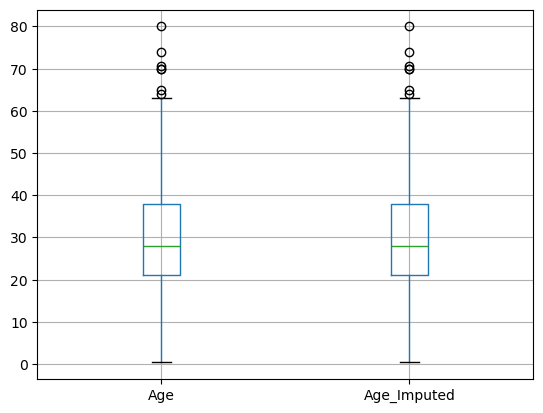

In [231]:
X_train[['Age', 'Age_Imputed']].boxplot()

In [232]:
# If our code is to be deployed for production, then for a user input of same fare, they might get different values of age, which is obviously not good so what can we do is
np.random.seed(42)
random.seed(42)

### Random Imputation for Categorical Columns

In [234]:
df = pd.read_csv('housing.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [235]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [236]:
y = df.SalePrice
X = df

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']

X_test['GarageQual_imputed'] = X_test['GarageQual']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [239]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,NaN
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,NaN,NaN
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd
...,...,...,...,...,...
1095,Gd,TA,176432,TA,Gd
1130,TA,TA,135000,TA,TA
1294,NaN,TA,115000,TA,NaN
860,Gd,TA,189950,TA,Gd


In [269]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\12368\AppData\Local\Temp\ipykernel_29712\1181570982.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQua

In [271]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,TA
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,TA,Gd
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd
...,...,...,...,...,...
1095,Gd,TA,176432,TA,Gd
1130,TA,TA,135000,TA,TA
1294,NaN,TA,115000,TA,TA
860,Gd,TA,189950,TA,Gd


In [339]:
f1 = X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna())
f2 = X_train['GarageQual_imputed'].value_counts() / len(X_train)

In [341]:
temp = pd.concat([f1, f2], axis=1)
temp.columns = ['Original', 'Imputed']
temp

,Original,Imputed
TA,0.951087,0.950342
Fa,0.032609,0.034247
Gd,0.011775,0.011130
Ex,0.002717,0.002568
Po,0.001812,0.001712


Comparing the frequencies of categories before and after imputing missing values helps to evaluate the effect of the imputation process. Here's why this comparison is important:

1. Preserving Distribution:
When imputing missing values in categorical variables, it's crucial to ensure that the imputed values do not distort the original distribution of the categories.
By comparing the frequency distributions, you can check whether the proportions of each category remain similar after imputation. For example:
If the TA category was 95% before imputation, it should stay close to 95% afterward unless there’s a strong reason for it to change.
2. Validation of Imputation Strategy:
The comparison helps confirm whether the chosen imputation strategy (e.g., mode imputation, random sampling, etc.) works as intended.
For instance, if you used mode imputation and find that the most frequent category (TA in your case) becomes overly dominant, it may indicate that this method is overly simplistic for your data.
3. Detecting Bias:
If there are significant differences between the original and imputed frequencies, it could indicate that the imputation method introduced bias.
For example, if a less frequent category like Po is overrepresented after imputation, it may affect downstream analyses or model performance.
4. Ensuring Data Integrity:
Comparing frequencies ensures the integrity of the data is maintained post-imputation. This is especially important when the variable is a key predictor or feature in your model.
How to Act on the Results
Small Differences: Slight differences in frequencies, as in your output, are acceptable and often unavoidable due to the imputation process.
Significant Differences: If differences are substantial, reconsider the imputation strategy. For instance:
Use random sampling imputation based on the original distribution instead of constant imputation.
Use a predictive model to impute values more accurately.

#### Similarly, for 'FireplaceQu'

In [331]:
temp2 = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(df),
], axis=1)
temp2.columns = ['Original', 'imputed']

In [333]:
temp2

,Original,imputed
Gd,0.491143,0.395890
TA,0.405797,0.321918
Fa,0.043478,0.032877
Ex,0.033816,0.027397
Po,0.025765,0.021918
